In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import struct
from pathlib import Path
import numpy as np
import os

# Sheet 2

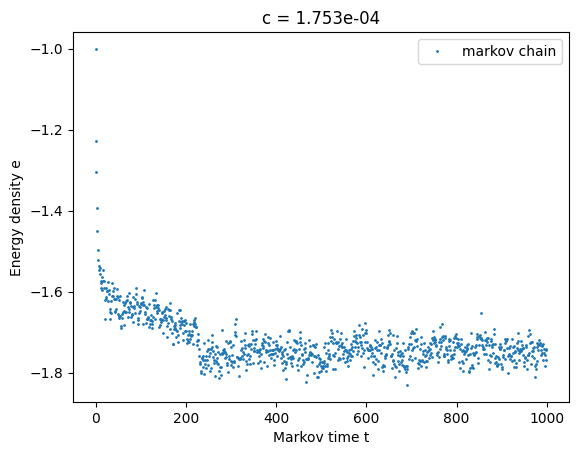

In [2]:
data = Path("energies/energies_t2.0_0").read_bytes()
data_array = np.frombuffer(data, dtype=np.float64)
plt.plot(data_array[:1000], linestyle="", marker="o", markersize=1, label="markov chain")
plt.title(f"c = {data_array[-1]:.3e}")
plt.ylabel("Energy density e")
plt.xlabel("Markov time t")
plt.legend(loc = "best")
plt.savefig("figures/Example.pdf")

In [3]:
for file in os.listdir("energies"):
    try:
        mean_str = r"$\langle e \rangle$"
        data = Path("energies/" + file).read_bytes()
        data_array = np.frombuffer(data, dtype=np.float64)
        mean = np.mean(data_array[10000:-1])
        plt.plot(data_array[:-1], linestyle="", marker="o", markersize=1, label="markov chain")
        plt.hlines(y=mean, xmin=0, xmax=len(data_array)-1, linestyle="--", color="r", label=mean_str)
        plt.title(rf"Specific heat c = {data_array[-1] * 64**2:.4e}; mean energy {mean_str} = {mean:.4e}")
        plt.ylabel("Energy density e")
        plt.xlabel("Markov time t")
        plt.legend(loc="best")
        plt.savefig("figures/" + file + ".png")
        plt.close()
    except IsADirectoryError:
        pass
print("Done!!")

Done!!


In [4]:
for file in os.listdir("magnetizations"):
    try:
        mean_str = r"$\langle |m| \rangle$"
        data = Path("magnetizations/" + file).read_bytes()
        data_array = np.frombuffer(data, dtype=np.float64)
        mean = np.mean(data_array[10000:-1])
        plt.plot(data_array[:-1], linestyle="", marker="o", markersize=1, label="markov chain")
        plt.hlines(y=mean, xmin=0, xmax=len(data_array)-1, linestyle="--", color="r", label=mean_str)
        plt.title(rf"Susceptibility $\chi$ = {data_array[-1] * 64**2:.4e}; mean magnetization {mean_str} = {mean:.4e}")
        plt.ylabel("Magnetization density |m|")
        plt.xlabel("Markov time t")
        plt.legend(loc="best")
        plt.savefig("figures/" + file + ".png")
        plt.close()
    except IsADirectoryError:
        pass
print("Done!!")

Done!!


# Sheet 3

In [5]:
def fit(x, tau):
    return np.exp(-x/tau)

def alt_fit(x, a, tau1, tau2):
    return a * np.exp(-x/tau1) + (1-a) * np.exp(-x/tau2)

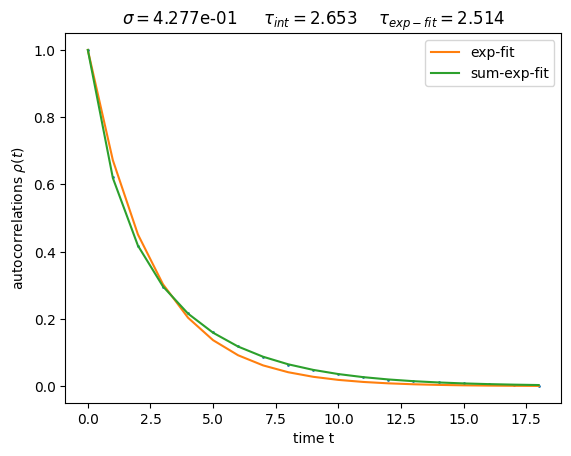

alt-fit(t) = 0.311 exp(-t/0.930) + 0.689 exp(-t/3.390)


In [6]:
data = Path("auto_correlations/auto_corr_m_t2.0").read_bytes()
data_array = np.frombuffer(data, dtype=np.float64)
tau = data_array[0]
std = data_array[1]
data_array = data_array[2:]
popt, pcov = curve_fit(fit, np.arange(data_array.shape[0]), data_array)
alt_popt, alt_pcov = curve_fit(alt_fit, np.arange(data_array.shape[0]), data_array, p0=[0.5,5,5])
plt.plot(data_array, linestyle="", marker="o", markersize=1)
plt.plot(fit(np.arange(data_array.shape[0]), *popt), linestyle="-", marker="", markersize=1, label="exp-fit")
plt.plot(alt_fit(np.arange(data_array.shape[0]), *alt_popt), linestyle="-", marker="", markersize=1, label="sum-exp-fit")
plt.title(r"$\sigma =$" + f"{std:.3e}" + f"\t" + r"$\tau_{int} = $" + f"{tau:.3f}" + f"\t" + r"$\tau_{exp-fit} = $" + f"{popt[0]:.3f}")
plt.ylabel(r"autocorrelations $\rho(t)$")
plt.xlabel("time t")
plt.legend(loc="best")
plt.show()
print(f"alt-fit(t) = {alt_popt[0]:.3f} exp(-t/{alt_popt[1]:.3f}) + {-alt_popt[0]+1:.3f} exp(-t/{alt_popt[2]:.3f})")

In [8]:
for file in os.listdir("auto_correlations"):
    try:
        data = Path("auto_correlations/" + file).read_bytes()
        data_array = np.frombuffer(data, dtype=np.float64)
        tau = data_array[0]
        std = data_array[1]
        data_array = data_array[2:]
        popt, pcov = curve_fit(fit, np.arange(data_array.shape[0]), data_array)
        alt_popt, alt_pcov = curve_fit(alt_fit, np.arange(data_array.shape[0]), data_array, p0=[0.5,5,5])
        plt.plot(data_array, linestyle="", marker="o", markersize=1)
        plt.plot(fit(np.arange(data_array.shape[0]), *popt), linestyle="-", marker="", markersize=1, label="exp-fit")
        plt.plot(alt_fit(np.arange(data_array.shape[0]), *alt_popt), linestyle="-", marker="", markersize=1, label="sum-exp-fit")
        plt.title(r"$\sigma =$" + f"{std:.3e}" + f"\t" + r"$\tau_{int} = $" + f"{tau:.3f}" + f"\t" + r"$\tau_{exp-fit} = $" + f"{popt[0]:.3f}")
        plt.ylabel(r"autocorrelations $\rho(t)$")
        plt.xlabel("time t")
        plt.legend(loc="best")
        plt.savefig("figures_sheet_3/" + file + ".png")
        plt.close()
    except IsADirectoryError:
        pass
print("Done!!")

Done!!
